[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/aapi_2025/blob/main/03_SIFT.ipynb)

### Scale-Invariant Feature Transform (SIFT)

SIFT permite localizar las características locales de una imagen, conocidas como "puntos clave" de la imagen. Estos puntos clave son invariantes ante la escala y la rotación, y se pueden utilizar para diversas aplicaciones de visión por computadora, como la comparación de imágenes, la detección de objetos, etc.



In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

import requests
from io import BytesIO
from PIL import Image

In [ ]:
url = 'https://raw.githubusercontent.com/upm-classes/aapi_2025/refs/heads/main/images/05246669_3774806731.jpg'

response = requests.get(url)

# Convertimos los bytes de la imagen en un arreglo numpy
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)

# Decodificamos la imagen desde el array numpy utilizando cv2
im1 = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

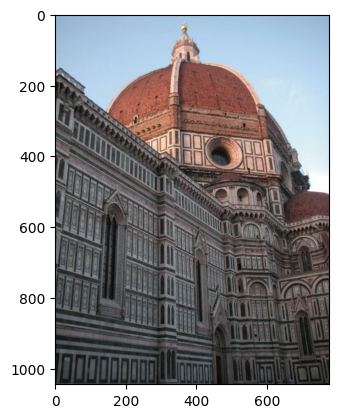

In [3]:
# Visualization of the images

plt.imshow(im1[...,::-1])
plt.show()

To operate with SIFT, we need to transform the RGB images into grayscale images.

In [4]:
gray_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

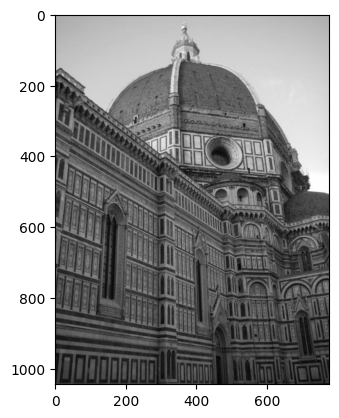

In [5]:
# Visualization of the images
plt.imshow(gray_im1, cmap='gray')
plt.show()

Para operar con SIFT, necesitamos transformar las imágenes en RGB a imágenes en escala de grises.

In [6]:
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(gray_im1, mask=None)

In [7]:
# Drawing keypoints in image

im1_sift = cv2.drawKeypoints(gray_im1, keypoints_1, im1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

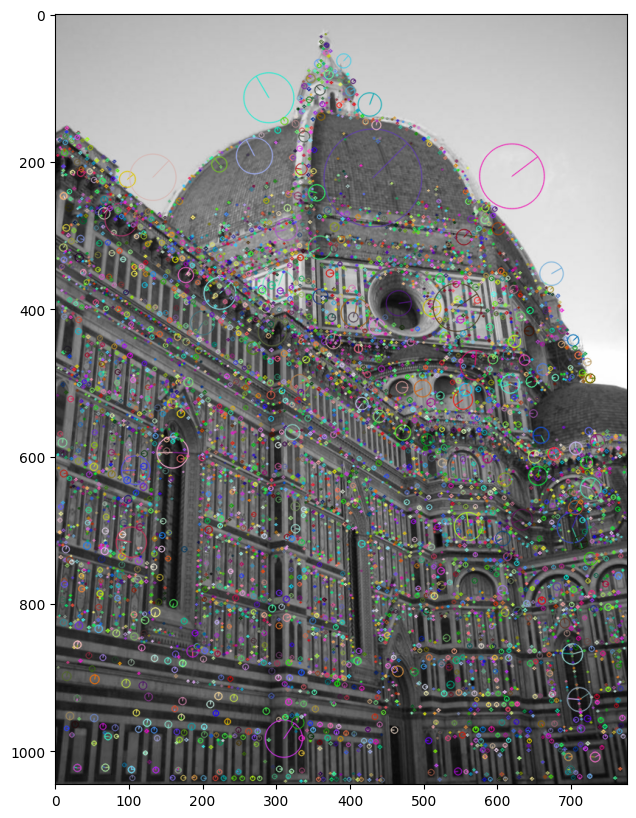

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(im1_sift)
plt.show()

### Coincidencia de características

Una aplicación de SIFT es emparejar dos imágenes. Los puntos clave entre dos imágenes se emparejan identificando a sus vecinos más cercanos.

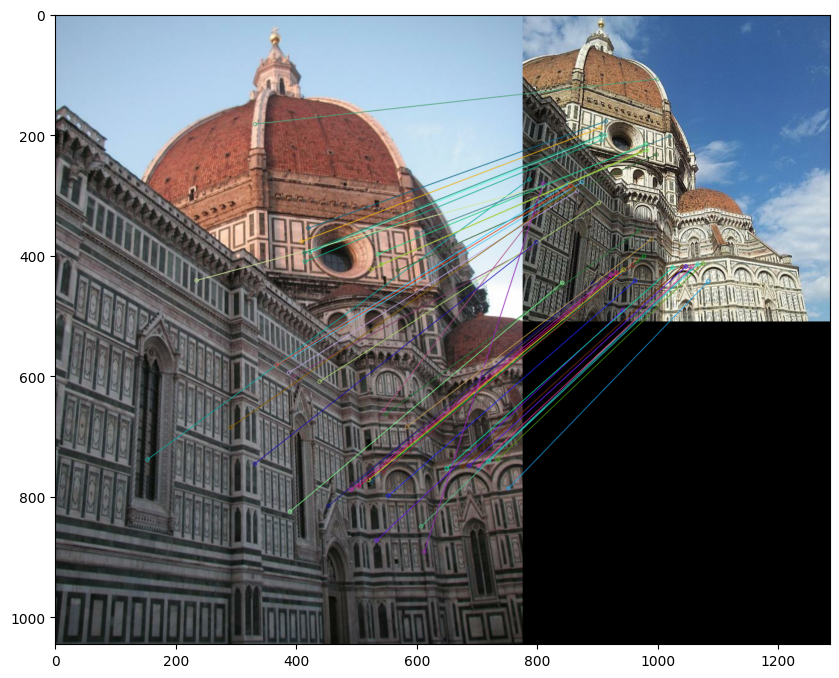

In [ ]:
# Open Images
url1 = 'https://raw.githubusercontent.com/upm-classes/aapi_2025/refs/heads/main/images/05246669_3774806731.jpg'
url2 = 'https://raw.githubusercontent.com/upm-classes/aapi_2025/refs/heads/main/images/06138839_8793674417.jpg'

response = requests.get(url1)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
im1 = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

response = requests.get(url2)
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
im2 = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# To grayscale
gray_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray_im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# SIFT calculation
sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(gray_im1, mask=None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray_im2, mask=None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# perform Matching
matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

im2_out = im2.copy() * 0.0

im_match = cv2.drawMatches(im1[...,::-1], keypoints_1,
                           im2[...,::-1], keypoints_2, matches[:50],
                           im2_out, flags=2)

plt.figure(figsize=(10,10))
plt.imshow(im_match)
plt.show()